In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
# Define parameters
genes = 100
samples = 40

sim_data_file = "data/demo2_data.tsv"
sim_network_file = "data/demo2_priors.tsv"

# Value range of transcription factor (TF) for each gene [0-500]
tf_range = [100, 800]

deviation = 100
noise = 0.75

mean = 0
std_dev = 0.1

In [26]:
# Create custom dataframe
df = pd.DataFrame(
    np.zeros((genes, samples)),
    columns=[f"S{i}" for i in range(1, samples + 1)],
    index=[f"G{i}" for i in range(genes)],
)

df.rename(index={"G0": "TF1"}, inplace=True)
df.loc["TF1"] = np.random.randint(tf_range[0], tf_range[1], samples)

print(df.shape)
df.head(10)

(100, 40)


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40
TF1,534.0,213.0,227.0,357.0,751.0,104.0,410.0,186.0,466.0,115.0,...,701.0,674.0,721.0,442.0,670.0,639.0,413.0,144.0,394.0,517.0
G1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
G9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
# Positive correlation
# for i in range(1, 11):
#     for j in range(1, 11):
#         df.loc[f"G{i}", f"S{j}"] = (df.loc["TF1", f"S{j}"] * noise + np.random.rand() * deviation).astype(int)
# df.head(10)

# Positive correlation
for i in range(1, samples):
    df.loc[f"G{i}"] = (df.loc["TF1"] * noise + np.random.rand() * deviation).astype(int)
df.head(10)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40
TF1,534.0,213.0,227.0,357.0,751.0,104.0,410.0,186.0,466.0,115.0,...,701.0,674.0,721.0,442.0,670.0,639.0,413.0,144.0,394.0,517.0
G1,412.0,171.0,182.0,279.0,575.0,90.0,319.0,151.0,361.0,98.0,...,537.0,517.0,552.0,343.0,514.0,491.0,321.0,120.0,307.0,399.0
G2,489.0,248.0,259.0,356.0,652.0,166.0,396.0,228.0,438.0,175.0,...,614.0,594.0,629.0,420.0,591.0,568.0,398.0,196.0,384.0,476.0
G3,450.0,209.0,220.0,317.0,613.0,127.0,357.0,189.0,399.0,136.0,...,575.0,555.0,590.0,381.0,552.0,529.0,359.0,157.0,345.0,437.0
G4,469.0,229.0,239.0,337.0,632.0,147.0,376.0,208.0,418.0,155.0,...,595.0,574.0,610.0,400.0,571.0,548.0,379.0,177.0,364.0,457.0
G5,476.0,235.0,246.0,343.0,639.0,153.0,383.0,215.0,425.0,162.0,...,601.0,581.0,616.0,407.0,578.0,555.0,385.0,183.0,371.0,463.0
G6,464.0,223.0,234.0,331.0,627.0,141.0,371.0,203.0,413.0,150.0,...,589.0,569.0,604.0,395.0,566.0,543.0,373.0,171.0,359.0,451.0
G7,472.0,231.0,242.0,339.0,635.0,150.0,379.0,211.0,421.0,158.0,...,597.0,577.0,612.0,403.0,574.0,551.0,381.0,180.0,367.0,459.0
G8,442.0,201.0,212.0,309.0,605.0,119.0,349.0,181.0,391.0,128.0,...,567.0,547.0,582.0,373.0,544.0,521.0,351.0,149.0,337.0,429.0
G9,496.0,255.0,266.0,363.0,659.0,174.0,403.0,235.0,445.0,182.0,...,621.0,601.0,636.0,427.0,598.0,575.0,405.0,204.0,391.0,483.0


In [28]:
# # Negative correlation
# for i in range(1, 11):
#     for j in range(11, samples + 1):
#         df.loc[f"G{i}", f"S{j}"] = (df.loc["TF1"].max() - df.loc["TF1", f"S{j}"] * noise + np.random.rand() * deviation).astype(int)

# Add Random noise to the data
for i in range(11, genes):
    df.loc[f"G{i}"] = np.random.randint(tf_range[0], tf_range[1], samples)
df.head(10)

,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,...,S31,S32,S33,S34,S35,S36,S37,S38,S39,S40
TF1,534.0,213.0,227.0,357.0,751.0,104.0,410.0,186.0,466.0,115.0,...,701.0,674.0,721.0,442.0,670.0,639.0,413.0,144.0,394.0,517.0
G1,412.0,171.0,182.0,279.0,575.0,90.0,319.0,151.0,361.0,98.0,...,537.0,517.0,552.0,343.0,514.0,491.0,321.0,120.0,307.0,399.0
G2,489.0,248.0,259.0,356.0,652.0,166.0,396.0,228.0,438.0,175.0,...,614.0,594.0,629.0,420.0,591.0,568.0,398.0,196.0,384.0,476.0
G3,450.0,209.0,220.0,317.0,613.0,127.0,357.0,189.0,399.0,136.0,...,575.0,555.0,590.0,381.0,552.0,529.0,359.0,157.0,345.0,437.0
G4,469.0,229.0,239.0,337.0,632.0,147.0,376.0,208.0,418.0,155.0,...,595.0,574.0,610.0,400.0,571.0,548.0,379.0,177.0,364.0,457.0
G5,476.0,235.0,246.0,343.0,639.0,153.0,383.0,215.0,425.0,162.0,...,601.0,581.0,616.0,407.0,578.0,555.0,385.0,183.0,371.0,463.0
G6,464.0,223.0,234.0,331.0,627.0,141.0,371.0,203.0,413.0,150.0,...,589.0,569.0,604.0,395.0,566.0,543.0,373.0,171.0,359.0,451.0
G7,472.0,231.0,242.0,339.0,635.0,150.0,379.0,211.0,421.0,158.0,...,597.0,577.0,612.0,403.0,574.0,551.0,381.0,180.0,367.0,459.0
G8,442.0,201.0,212.0,309.0,605.0,119.0,349.0,181.0,391.0,128.0,...,567.0,547.0,582.0,373.0,544.0,521.0,351.0,149.0,337.0,429.0
G9,496.0,255.0,266.0,363.0,659.0,174.0,403.0,235.0,445.0,182.0,...,621.0,601.0,636.0,427.0,598.0,575.0,405.0,204.0,391.0,483.0


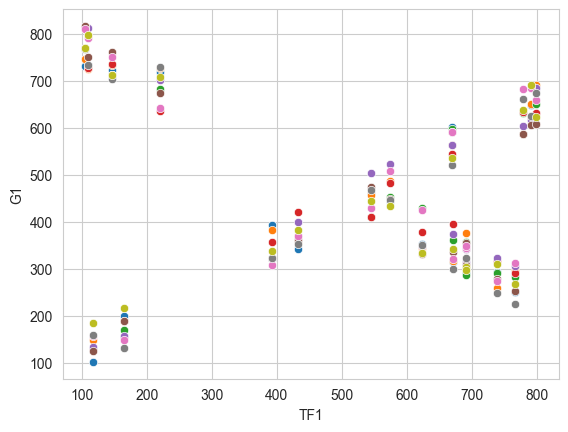

In [204]:
# Plot TF1 and G1 
for i in range(1, 10):
    sns.scatterplot(x=df.loc["TF1"], y=df.loc[f"G{i}"])


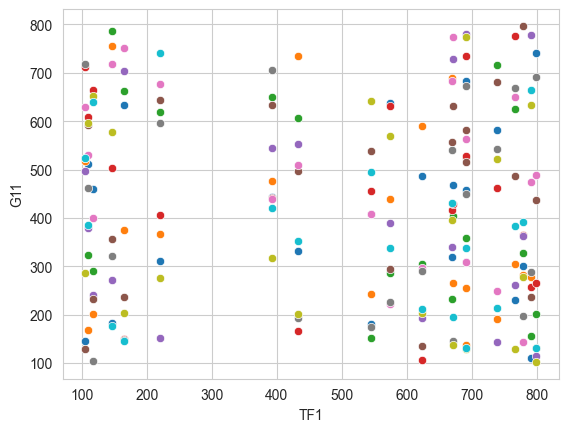

In [205]:
# Random noise
for i in range(11, 21):
    sns.scatterplot(x=df.loc["TF1"], y=df.loc[f"G{i}"])


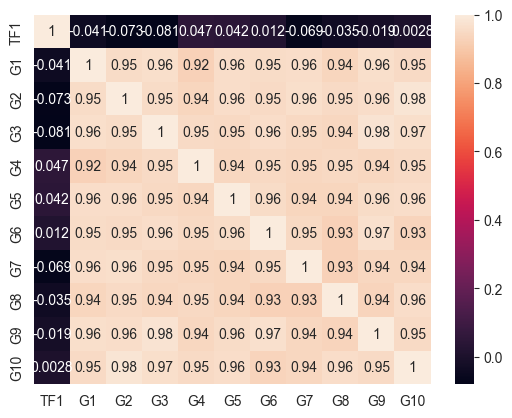

In [189]:
# Plot correlation of TF1 with G1 to G10
sns.heatmap(
    df.loc[
        [
            "TF1",
            "G1",
            "G2",
            "G3",
            "G4",
            "G5",
            "G6",
            "G7",
            "G8",
            "G9",
            "G10"
        ]
    ].T.corr(),
    annot=True,
)
plt.show()

In [29]:
# Export data to file
df.to_csv(sim_data_file, sep="\t")

In [30]:
# Create a network file
with open(sim_network_file, "w") as f:
    for i in range(1, genes):
        f.write(f"TF1\tG{i}\t1\n")
f.close()

# Add header to the network file as Regulator Target MI
network = pd.read_csv(sim_network_file, sep="\t", header=None)
network.columns = ["tf", "target", "action"]
network.to_csv(sim_network_file, index=False, sep="\t")
network.head(10)

,tf,target,action
0,TF1,G1,1
1,TF1,G2,1
2,TF1,G3,1
3,TF1,G4,1
4,TF1,G5,1
5,TF1,G6,1
6,TF1,G7,1
7,TF1,G8,1
8,TF1,G9,1
9,TF1,G10,1


In [41]:
# Generate New Test Data
# Define parameters
genes = 100
samples = 40

sim_data_file = "data/demo3_data.tsv"
sim_network_file = "data/demo3_priors.tsv"

# Value range of transcription factor (TF) for each gene [0-500]
tf_range = [100, 800]

deviation = 100
noise = 0.75

# Create custom dataframe
df = pd.DataFrame(
    np.zeros((genes, samples)),
    columns=[f"S{i}" for i in range(1, samples + 1)],
    index=[f"G{i}" for i in range(genes)],
)

# Fill with random data
for i in range(1, genes):
    df.loc[f"G{i}"] = np.random.randint(tf_range[0], tf_range[1], samples)

df.rename(index={"G0": "TF1"}, inplace=True)
df.loc["TF1"] = np.random.randint(tf_range[0], tf_range[1], samples)

# Positive correlation
for g in range(1, 11):
    for s in range(1, 21):
        df.loc[f"G{g}", f"S{s}"] = (df.loc["TF1", f"S{s}"] * noise + np.random.rand() * deviation).astype(int)

# Negative correlation
for g in range(11, 21):
    for s in range(1, 21):
        df.loc[f"G{g}", f"S{s}"] = (
                df.loc["TF1"].max() - df.loc["TF1", f"S{s}"] * noise + np.random.rand() * deviation).astype(int)

# Export data to file
df.to_csv(sim_data_file, sep="\t")

# Create a network file
with open(sim_network_file, "w") as f:
    for i in range(1, genes):
        f.write(f"TF1\tG{i}\t1\n")
f.close()

# Add header to the network file as Regulator Target MI
network = pd.read_csv(sim_network_file, sep="\t", header=None)
network.columns = ["tf", "target", "action"]
network.to_csv(sim_network_file, index=False, sep="\t")

In [192]:
import numpy as np


# Function to generate n equally spaced numbers between start and end (inclusive)
def generate_numbers(start, end, num):
    return np.linspace(start, end, num).tolist()


# Example usage
range_10_numbers = generate_numbers(0.5, 9.5, 10)  # Generates 10 numbers
range_11_numbers = generate_numbers(0.5, 9.5, 11)  # Generates 11 numbers

print("10 numbers:", range_10_numbers)
print("11 numbers:", range_11_numbers)


10 numbers: [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5]
11 numbers: [0.5, 1.4, 2.3, 3.2, 4.1, 5.0, 5.9, 6.8, 7.7, 8.6, 9.5]


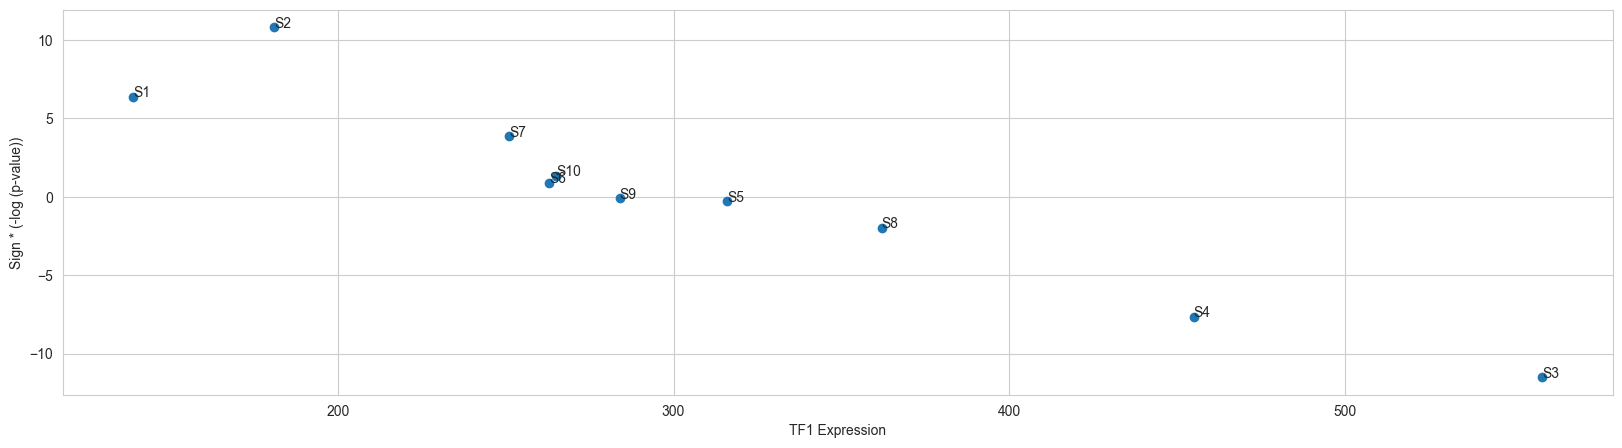

In [35]:
# 10 Samples 10 genes are upregulated +ve
pv = pd.read_csv('data/demo1_pvals.tsv', sep='\t', index_col=0)
gene_exp = pd.read_csv('data/demo1_data.tsv', sep='\t', index_col=0)

tf1 = gene_exp.loc['TF1']

pv["Expression"] = tf1

pv.head(10)

plt.figure(figsize=(20, 5))
plt.plot(pv["Expression"], np.sign(pv['TF1']) * np.log(abs(pv['TF1'])), 'o')
plt.xlabel("TF1 Expression")
plt.ylabel("Sign * (-log (p-value))")

for i in range(0, 10):
    plt.text(pv["Expression"][i], np.sign(pv['TF1'][i]) * np.log(abs(pv['TF1'][i])), f"S{i + 1}")
plt.show()


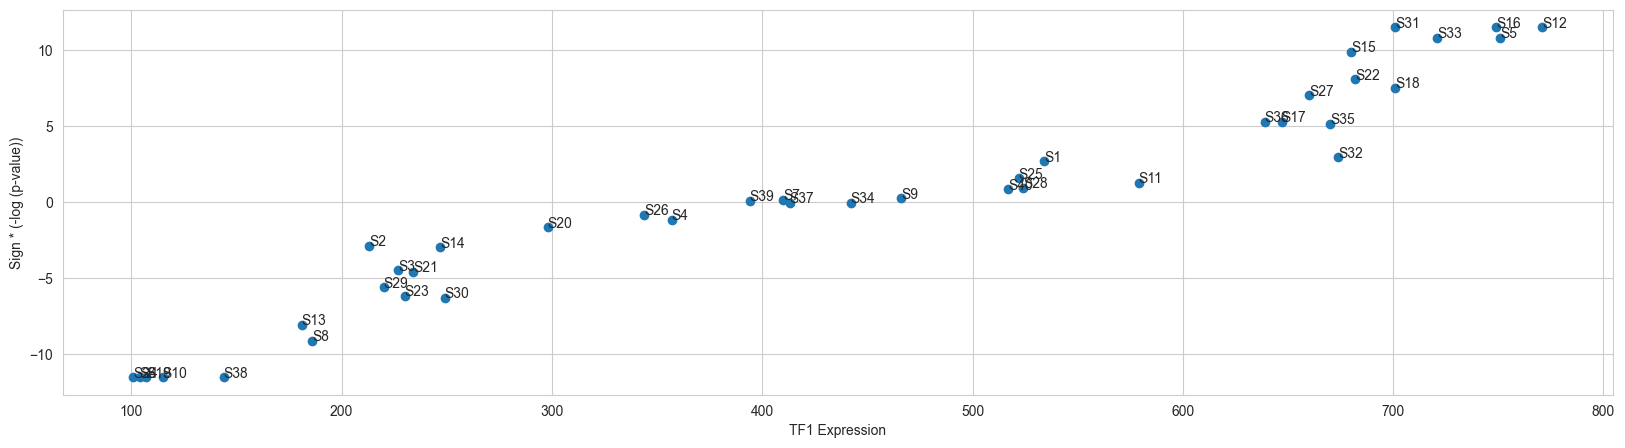

In [54]:
# 40 Samples 10 genes are upregulated
pv = pd.read_csv('data/demo2_pvals.tsv', sep='\t', index_col=0)
gene_exp = pd.read_csv('data/demo2_data.tsv', sep='\t', index_col=0)

tf1 = gene_exp.loc['TF1']

pv["Expression"] = tf1

pv.head(10)

plt.figure(figsize=(20, 5))
plt.plot(pv["Expression"], np.sign(pv['TF1']) * -np.log(abs(pv['TF1'])), 'o')
plt.xlabel("TF1 Expression")
plt.ylabel("Sign * (-log (p-value))")

for i in range(0, 40):
    plt.text(pv["Expression"][i], np.sign(pv['TF1'][i]) * - np.log(abs(pv['TF1'][i])), f"S{i + 1}")
plt.show()


1.0
1.0
-1.0
-1.0
-1.0
1.0
1.0
-1.0
-1.0
1.0


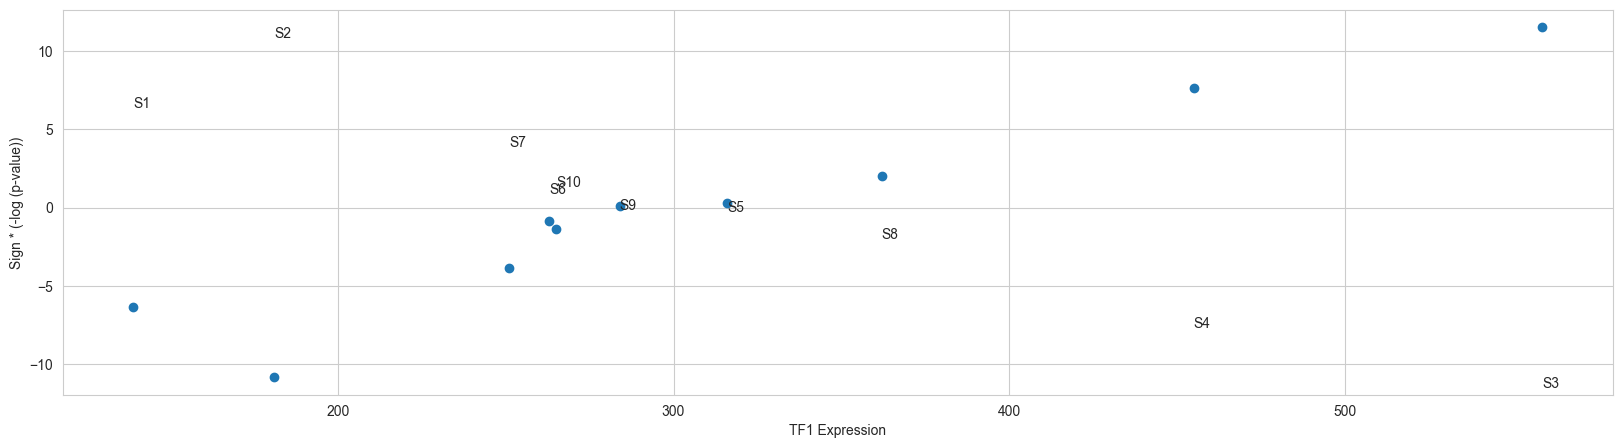

In [52]:
# # 10 Samples 10 genes are downregulated
pv = pd.read_csv('data/demo1_pvals_down.tsv', sep='\t', index_col=0)
gene_exp = pd.read_csv('data/demo1_data.tsv', sep='\t', index_col=0)

tf1 = gene_exp.loc['TF1']

pv["Expression"] = tf1

pv.head(10)

plt.figure(figsize=(20, 5))
plt.plot(pv["Expression"], np.sign(pv['TF1']) * np.log(abs(pv['TF1'])), 'o')
plt.xlabel("TF1 Expression")
plt.ylabel("Sign * (-log (p-value))")

for i in range(0, 10):
    print(np.sign(pv['TF1'][i]))
    plt.text(pv["Expression"][i], np.sign(pv['TF1'][i]) * (-1) * np.log(abs(pv['TF1'][i])), f"S{i + 1}")
plt.show()


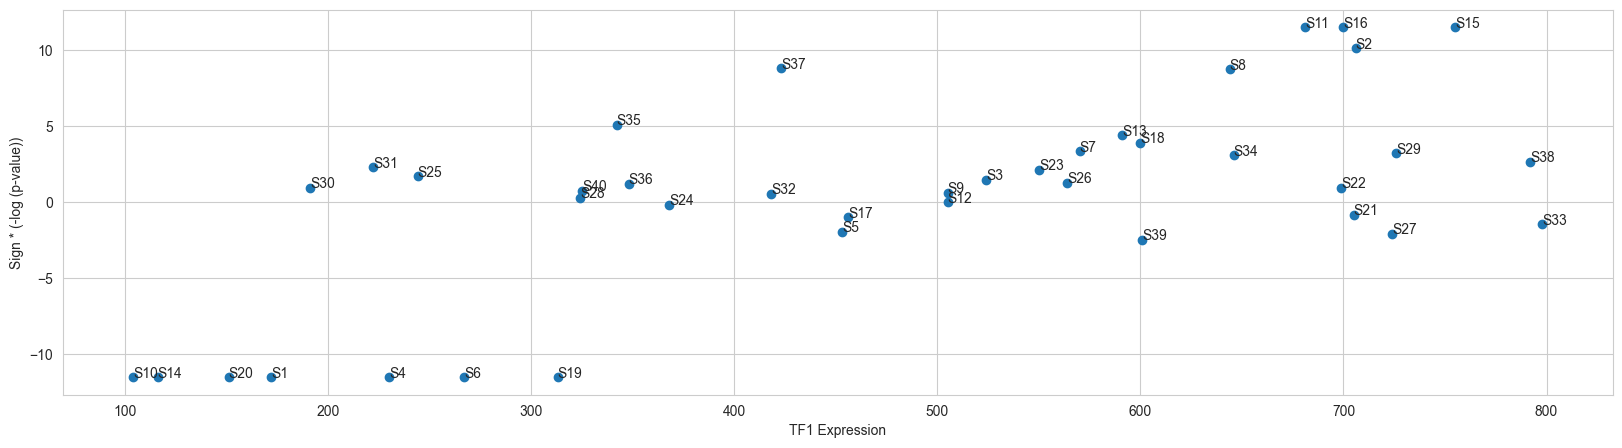

In [57]:
# 40 Samples 10 genes are upregulated and 10 genes are downregulated
pv = pd.read_csv('data/demo3_pvals.tsv', sep='\t', index_col=0)
gene_exp = pd.read_csv('data/demo3_data.tsv', sep='\t', index_col=0)

tf1 = gene_exp.loc['TF1']

pv["Expression"] = tf1

pv.head(10)

plt.figure(figsize=(20, 5))
plt.plot(pv["Expression"], np.sign(pv['TF1']) * -np.log(abs(pv['TF1'])), 'o')
plt.xlabel("TF1 Expression")
plt.ylabel("Sign * (-log (p-value))")

for i in range(0, 40):
    plt.text(pv["Expression"][i], np.sign(pv['TF1'][i]) * -np.log(abs(pv['TF1'][i])), f"S{i + 1}")
plt.show()
